In [17]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

train_data = data[0:6000]
test_data = data[6000:10000]


size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image_train   = len(train_data)
num_image_test    = len(test_data)


test_data[1]

'8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,76,146,101,185,254,255,171,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,197,253,253,253,253,253,253,253,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,253,253,253,253,253,253,252,253,213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,253,253,232,187,102,94,94,245,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,253,253,48,0,0,0,0,206,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,253,179,13,9,0,1,109,249,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,227,253,253,253,233,157,165,253,253,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,253,253,253,253,253,253,253,220,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,253,253,253,253,253,253,253,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,253,253,253,253,253,253,253,156,0,0,0,0,0,0

In [33]:
count1     = 0     # count for the number of images
count2     = 0

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image_train  = np.empty((size_row * size_col, num_image_train), dtype=float)
list_label_train  = np.empty(num_image_train, dtype=int)


list_image_test  = np.empty((size_row*size_col,num_image_test),dtype=float)
list_label_test  = np.empty(num_image_test,dtype=int)

for line1 in train_data:

    line_data   = line1.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    len(label)

    list_label_train[count1]       = label
    list_image_train[:, count1]    = im_vector

    count1 += 1

    
    

for line2 in test_data:

    line_data   = line2.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count2]       = label
    list_image_test[:, count2]    = im_vector

    count2 += 1



(4000,)

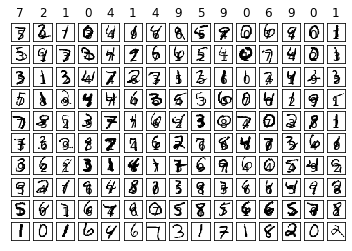

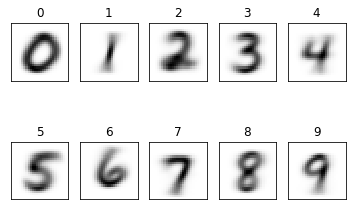

In [20]:
#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)



    #plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [34]:
def sigmoid(z):
    return 1 / 1 + np.exp(-z)

In [36]:
print(list_image_train.shape)
print(list_label_train.shape)
print(list_image_test.shape)
print(list_label_test.shape)

(784, 6000)
(6000,)
(784, 4000)
(4000,)


In [55]:
#theta initialize
input_units  = 784   #neurons in input layer
hidden_units1 = 196   #neurons in hidden layer
hidden_units2 = 49    #neurons in hidden layer
output_units = 10   #neurons in output layer

def initialize_parameters():
    #initial values should have zero mean and 0.1 standard deviation
    mean = 0        #mean of parameters 
    std = 0.03      #standard deviation
    
    layer1_weights = np.random.normal(mean,std,(hidden_units1,input_units+1))    
    layer1_biases = np.ones((input_units,1))
    layer2_weights = np.random.normal(mean,std,(hidden_units2,hidden_units1+1))          
    layer2_biases = np.ones((hidden_units1,1))       
    layer3_weights = np.random.normal(mean,std,(output_units,hidden_units2+1))
    layer3_biases = np.ones((hidden_units2,1))
    
    parameter_list =[layer1_weights,layer1_biases,layer2_weights,layer2_biases,layer3_weights,layer3_biases]
    
    return parameter_list

In [56]:
parameter_list = initialize_parameters()

In [57]:
parameter_list[1].shape

(784, 1)

In [62]:
def forward_prop(data,parameter):
    m = len(list_image_train)
    
    layer1_weight = parameter[0]
    layer1_biases = parameter[1]
    
    layer2_weight = parameter[2]
    layer2_biases = parameter[3]
    
    layer3_weight = parameter[4]
    layer3_biases = parameter[5]
    
    new_data1 = np.r_[[data],[layer1_biases]]
    logits = np.dot(layer1_weight,new_data1) 
    activate_fun1 = sigmoid(logits)
    new_data2 = np.r_[[activate_fun1],[layer2_biases]]
    activate_fun2 = np.dot(layer2_weight,activate_fun1)
    activate_fun3 = sigmoid(activate_fun2)
    new_data3 = np.r_[[activate_fun3],[layer3_biases]]
    acitvate_fun4 = np.dot(layer3_weight,activate_fun3)
    output = sigmoid(activate_fun4)
    
    return activate_fun1,output

In [63]:
activate_fun , output = forward_prop(list_image_train,parameter_list)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 6000 and the array at index 1 has size 1